# 임베딩(Embedding)

* 워드 임베딩은 단어를 컴퓨터가 이해하고, 효율적으로 처리할 수 있도록 단어를 **벡터화**하는 기술
* 워드 임베딩은 단어의 의미를 잘 표현해야만 하며, 현재까지도 많은 표현 방법이 연구
* 워드 임베딩을 거쳐 **잘 표현된 단어 벡터들은 계산이 가능**하며, 모델 투입도 가능

## 인코딩(Encoding)

* 기계는 자연어(영어, 한국어 등)을 이해할 수 없음
* 데이터를 기계가 이해할 수 있도록 숫자 등으로 변환해주는 작업이 필요
* 이러한 작업을 인코딩이라고 함

* **텍스트 처리**에서는 주로 **정수 인코딩, 원 핫 인코딩**을 사용



---


* Embedding: 토크나이징된 단어 토큰들을 벡터들로 변환하는 과정
* Encoding: Embedding된 벡터들을 Sentence Matrix로 변환하는 과정

### 정수 인코딩

#### dictionary를 이용한 정수 인코딩

* 각 단어와 정수 인덱스를 연결하고, 토큰을 변환해주는 정수 인코딩

In [ ]:
text = "평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라."

tokens = [x for x in text.split(' ')] # text를 split해서 list로
unique = set(tokens) # 중복되지 않게
unique = list(unique) # 다시 list로

token2idx = {}
for i in range(len(unique)):
  token2idx[unique[i]] = i
# unique한 값에 i번째 해당하는 키워드에 대해서 i라는 index를 넣어줌

encode = [token2idx[x] for x in tokens]
# token에 대해서 전체 encode변경한 값 출
encode

[2, 5, 0, 6, 4, 9, 8, 7, 0, 3, 1]

#### keras를 이용한 정수 인코딩

* 정수 인코딩은 단어에 정수로 레이블을 부여
* `dictionary`, `nltk` 패키지를 이용한 방법들도 있지만, `keras`에서는 텍스트 처리에 필요한 도구들을 지원
* 해당 도구는 자동으로 단어 빈도가 높은 단어의 인덱스는 낮게끔 설정

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

text = "평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라."

t = Tokenizer()
t.fit_on_texts([text])
print(t.word_index) # word가 차지하고 있는 index값 출력

encoded = t.texts_to_sequences([text])[0]
print(encoded)
# 단어별 index값이 encode된 결과 형태로
# 2가 평생, 3이 살, 1이 것처럼 .... -> 평생 살 것처럼 꿈을 꾸어라...~

{'것처럼': 1, '평생': 2, '살': 3, '꿈을': 4, '꾸어라': 5, '그리고': 6, '내일': 7, '죽을': 8, '오늘을': 9, '살아라': 10}
[2, 3, 1, 4, 5, 6, 7, 8, 1, 9, 10]


### 원 핫 인코딩(One-Hot Encoding)

* 위에 것 보다 조금 더 자주쓰임

#### 조건문과 반복문을 이용한 원 핫 인코딩

* 원 핫 인코딩은 정수 인코딩한 결과를 벡터로 변환한 인코딩
* 원 핫 인코딩은 전체 단어 개수 만큼의 길이를 가진 배열에 해당 정수를 가진 위치는 1, 나머지는 0을 가진 벡터로 변환   

In [ ]:
import numpy as np

one_hot = []
for i in range(len(encoded)): # len(encoded) -> 11
  temp = []
  for j in range(max(encoded)): # range(max(encoded)) -> range(0,10)
    if j == (encoded[i] -1):
      temp.append(1) # 단어가 같으면 temp에 1을 넣어주고
    else:
      temp.append(0) # 같지 않으면 0
  one_hot.append(temp)

np.array(one_hot)
# 전체 배열에서 하나만 1

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

#### keras를 이용한 원 핫 인코딩

* `keras`에서는 정수 인코딩을 원 핫 인코딩을 간단하게 변환해주는 `to_categorical()` 함수를 제공

In [ ]:
from tensorflow.keras.utils import to_categorical

one_hot = to_categorical(encoded)
one_hot

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)


* 케라스에서 activation 인자의 디폴트 값은 없다. 이는 활성화 함수를 명시적으로 지정해주어야 함을 의미. 케라스에서 제공하는 **activation 함수의 종류**
> * linear : 입력과 동일한 값을 출력.
> * sigmoid : 시그모이드 함수를 사용하여 출력값을 0과 1 사이의 값으로 변환합니다. 이진 분류 모델에서 출력층에 많이 사용됩니다.
> * tanh : 하이퍼볼릭 탄젠트 함수를 사용하여 출력값을 -1과 1 사이의 값으로 변환합니다. 은닉층에 많이 사용됩니다.
> * relu : ReLU(Rectified Linear Unit) 함수를 사용하여 출력값을 0 이상의 값으로 변환합니다. 은닉층에 많이 사용됩니다.
> * softmax : softmax 함수를 사용하여 출력값을 다중 클래스 분류에 적합한 확률 값으로 변환합니다. 다중 클래스 분류 모델에서 출력층에 많이 사용됩니다.
> * selu : SELU(Scaled Exponential Linear Unit) 함수를 사용하여 출력값을 0과 1 사이로 스케일링합니다. 자기 정규화(Self-Normalizing) 효과로 인해 딥러닝 모델의 성능을 향상시킬 수 있습니다.
<br><br>
이 외에도 다양한 activation 함수가 존재합니다. 필요에 따라서 다른 activation 함수를 사용할 수도 있습니다.


## IMDB 데이터

- 인터넷 영화 데이터베이스(Internet Movie Database)

- 양극단의 리뷰 5만개로 이루어진 데이터셋
  - 훈련데이터: 25,000개
  - 테스트데이터 : 25,000개

  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQlk-f2SHB6-Vs3RWwIugMctsyEn2QVZWC5KQ&usqp=CAU">

- https://www.imdb.com/interfaces/

### module import

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten
# Dense는 Fully Connected Layer, 입력 뉴런과 출력 뉴런이 모두 연결되어 있는 밀집(dense)한 구조, 일반적으로 활성화 함수로는 ReLU, sigmoid, tanh 등이 사용
# Flatten은 펼쳐주는 레이어, 입력 데이터를 1차원으로 평탄화(flatten), 2D 혹은 3D의 특징 맵(feature map)을 1D 벡터로 변환하여, 이후의 레이어에서 처리하기 쉽게 만들어주는 역할

### 데이터 로드

In [ ]:
num_words = 1000 #단어개수를 1000개만

(x_train, y_train), (x_test, y_test) = imdb. load_data(num_words=num_words)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


### 데이터 확인
- 긍정: 1
- 부정: 0

In [ ]:
print(x_train[0]) # index로 들어와있고
print(y_train[0]) # 결과는 1 :긍정

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [ ]:
for i in range(10):
  if y_train[i] == 0 :
    label = "부정" # 0이면 부정
  else:
    label = "긍정" # 아니면 긍정

  print("{}\n{}".format(x_train[i], label))

#결과를 보면 길이가 제각각임. 리뷰를 길게쓴사람 짧게쓴사람.. 있어서 -> 길이 맞춰준

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
긍정
[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 2, 2

### 데이터 전처리
- 모든 데이터를 같은 길이로 맞추기

  - `pad_sequence()`
    - 데이터가 maxlen보다 길면 데이터를 자름

    - 데이터가 길면 `padding` 설정
      - `pre`: 데이터 앞에 0으로 채움
      -  `post`: 데이터 뒤에 0으로 채움


- 모든 데이터(문장 하나하나)가 같은 길이로 맞추어야 `Embedding` 레이어를 사용할 수 있음

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_len = 100

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding = 'pre') # padding = 'pre'는 앞에 비어있는 공간을 0으로 채워줌
pad_x_test = pad_sequences(x_test, maxlen=max_len, padding = 'pre')

In [ ]:
print(len(x_train[0]))
print(len(pad_x_train[0]))
# 218개에서 100개로 줄임
# pad_x_train[5]로 하면 짧게 쓴 게 100개로 늘어남

218
100


In [ ]:
print(x_train[0])
print(pad_x_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[  2  33   6  22  12 215  28  77  52   5  14 407  16  82   2   8   4 107
 117   2  15 256   4   2   7   2   5 723  36  71  43 530

### 모델 구성

In [ ]:
model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 32,
                    input_length = max_len)) # input_dim에는 입력으로 사용되는 전체 단어 개수, output_dim 임베딩 벡터의 차원, input_length는 입력 시퀀스의 길이
model.add(Flatten()) # Flatten 레이어는 다차원의 입력을 1차원으로 평평하게 만든. 이는 임베딩 레이어의 출력을 평탄화하여 다음 레이어에 전달하기 위함
model.add(Dense(1, activation='sigmoid')) # 감성분석이므로 dense=1, 활성화 함수로 시그모이드 함수가 사용되었는데, 이는 이진 분류 문제(긍정 또는 부정)에서 일반적으로 사용

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           32000     
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 1)                 3201      
                                                                 
Total params: 35201 (137.50 KB)
Trainable params: 35201 (137.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 모델 컴파일 및 학습

In [ ]:
model.compile(optimizer = 'rmsprop', # RMSprop은 경사 하강법의 한 종류로, 각 가중치마다 학습률을 조정하여 빠르게 수렴하도록 도와줌
              loss = 'binary_crossentropy', # 이진 분류에 적합한 손실 함수로, 신경망이 예측한 확률 분포와 실제 레이블의 분포 간의 차이를 계산
              metrics = ['acc']) # 모델의 성능을 평가할 지표를 지정

In [ ]:
history = model.fit(pad_x_train, y_train,
                    epochs=10,
                    batch_size =32,
                    validation_split =0.2)
# overfitting. Regularization해주는 부분이 모델에 없어서 ovefitting될 수 밖에..

# Regularization(정칙화)
# W(weight)가 너무 큰 값들을 가지지 않도록 하는 것이다.
# W가 너무 큰 값을 가지게 되면 과하게 구불구불한 형태의 함수가 만들어지는데, Regularization은 이런 모델의 복잡도를 낮추기 위한 방법이다.
# Regularization은 단순하게 cost function을 작아지는 쪽으로 학습하면 특정 가중치 값들이 커지면서 결과를 나쁘게 만들기 때문에 cost function을 바꾼다.

Epoch 1/10
625/625 [==============================] - 5s 7ms/step - loss: 0.5679 - acc: 0.7090 - val_loss: 0.4237 - val_acc: 0.8072
Epoch 2/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3780 - acc: 0.8329 - val_loss: 0.3965 - val_acc: 0.8146
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3401 - acc: 0.8516 - val_loss: 0.3906 - val_acc: 0.8204
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3123 - acc: 0.8698 - val_loss: 0.3864 - val_acc: 0.8248
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2824 - acc: 0.8862 - val_loss: 0.3930 - val_acc: 0.8248
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2501 - acc: 0.9032 - val_loss: 0.4068 - val_acc: 0.8196
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2172 - acc: 0.9191 - val_loss: 0.4232 - val_acc: 0.8154
Epoch 8/10
625/625 [==============================] - 3s 5ms/step - loss: 0.

### 시각화

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

<ipython-input-18-60d85d81d40e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [ ]:
hist_dict = history.history # history.history는 모델을 학습한 후에 반환되는 히스토리 객체의 속성 중 하나
hist_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

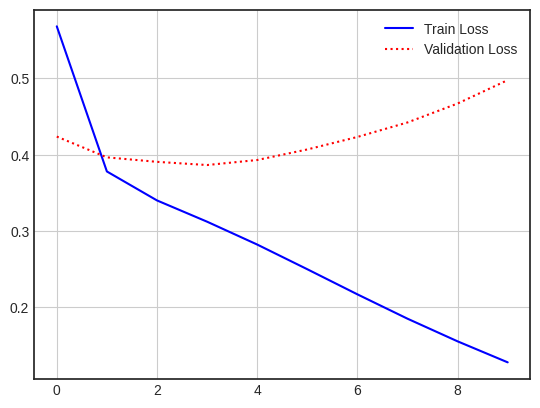

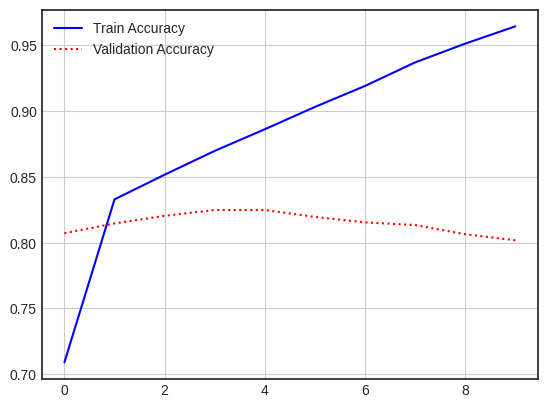

In [ ]:
plt.plot(hist_dict['loss'], 'b-', label = 'Train Loss') # train loss값은 blue
plt.plot(hist_dict['val_loss'], 'r:', label = 'Validation Loss') # validation loss는 빨간색 점선
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict['acc'], 'b-', label = 'Train Accuracy')
plt.plot(hist_dict['val_acc'], 'r:', label = "Validation Accuracy")
plt.legend()
plt.grid()

plt.show()
# overfitting

* 훈련 과정에서 훈련 손실과 검증 손실이 어떻게 변화하는지를 시각적으로 확인할 수 있습니다. 이 그래프를 통해 모델이 훈련 데이터에 대해 어떻게 수렴되는지, 과적합이 발생하는지 등을 파악할 수 있습니다. 손실이 감소하다가 증가하는 부분이 있다면 과적합의 가능성이 있습니다.

* 훈련 과정에서 훈련 정확도와 검증 정확도가 어떻게 변화하는지를 시각적으로 확인할 수 있습니다. 이 그래프를 통해 모델이 훈련 데이터에 대해 얼마나 잘 수행되는지와 함께, 검증 데이터에 대해서도 어떤 성능을 보이는지를 파악할 수 있습니다.

### 모델 평가

In [ ]:
model.evaluate(pad_x_test, y_test)
# 80%

782/782 [==============================] - 2s 3ms/step - loss: 0.4857 - acc: 0.8048


[0.48568522930145264, 0.8048400282859802]

### 단어의 수를 늘린 후 재학습

In [ ]:
num_words = 2000
max_len = 400

(x_train, y_train), (x_test, y_test) = imdb. load_data(num_words=num_words)

pad_x_train_2 = pad_sequences(x_train, maxlen=max_len, padding = 'pre')
pad_x_test_2 = pad_sequences(x_test, maxlen=max_len, padding = 'pre')

데이터 확인

In [ ]:
print(x_train[0])
print(pad_x_train_2[0]) # 앞에가 0으로 채워짐

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    

In [ ]:
model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 32,
                    input_length = max_len)) # input_dimension에는 전체 단어 개수, output_dim에는 32정도로
model.add(Flatten()) # 펼쳐주고
model.add(Dense(1, activation='sigmoid')) # 감성분석이므로 dense=1, 결과적으로 긍정이냐 부정이냐

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 400, 32)           64000     
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 12801     
                                                                 
Total params: 76801 (300.00 KB)
Trainable params: 76801 (300.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
# metrics는 accuracy로

In [ ]:
history2 = model.fit(pad_x_train_2, y_train,
                    epochs=10,
                    batch_size =32,
                    validation_split =0.2)

Epoch 1/10
625/625 [==============================] - 4s 5ms/step - loss: 0.5132 - acc: 0.7440 - val_loss: 0.3463 - val_acc: 0.8560
Epoch 2/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2915 - acc: 0.8795 - val_loss: 0.3088 - val_acc: 0.8714
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2376 - acc: 0.9046 - val_loss: 0.3247 - val_acc: 0.8694
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 0.1950 - acc: 0.9265 - val_loss: 0.3163 - val_acc: 0.8734
Epoch 5/10
625/625 [==============================] - 3s 5ms/step - loss: 0.1547 - acc: 0.9461 - val_loss: 0.3395 - val_acc: 0.8638
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.1176 - acc: 0.9637 - val_loss: 0.3571 - val_acc: 0.8606
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.0860 - acc: 0.9761 - val_loss: 0.3815 - val_acc: 0.8576
Epoch 8/10
625/625 [==============================] - 3s 5ms/step - loss: 0.

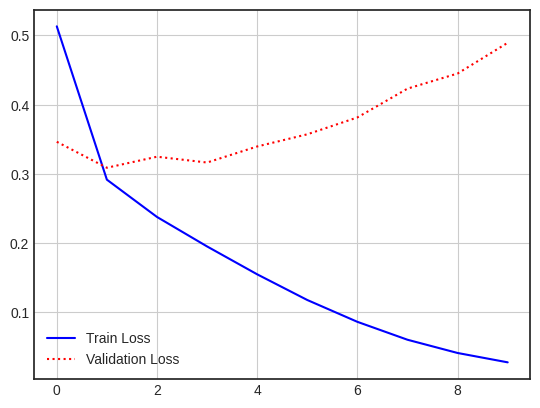

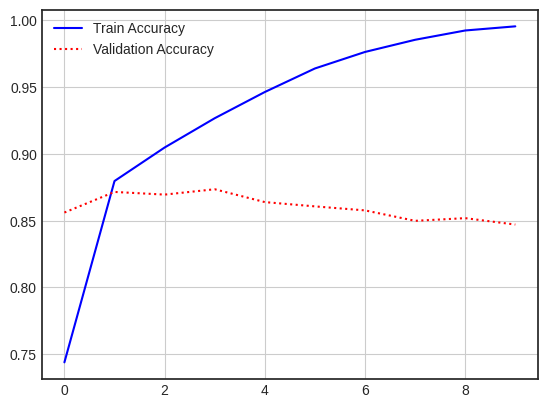

In [ ]:
hist_dict2 = history2.history
hist_dict2.keys()

plt.plot(hist_dict2['loss'], 'b-', label = 'Train Loss') # train loss값은 blue
plt.plot(hist_dict2['val_loss'], 'r:', label = 'Validation Loss') # validation loss는 빨간색 점선
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict2['acc'], 'b-', label = 'Train Accuracy')
plt.plot(hist_dict2['val_acc'], 'r:', label = "Validation Accuracy")
plt.legend()
plt.grid()

plt.show()

In [ ]:
model.evaluate(pad_x_test_2, y_test)
# 85로 조금 올라감

782/782 [==============================] - 2s 2ms/step - loss: 0.4696 - acc: 0.8507


[0.46961289644241333, 0.8507199883460999]

위의 결과도 나쁘지 않으나 과적합이 되는 이유
- 단어간 관계나 문장 구조 등 의미적 연결을 고려하지 않음

- 시퀀스 전체를 고려한 특성을 학습하는 것은 `Embedding`층 위에 `RNN`층이나 `1D 합성곱`을 추가하는 것이 좋음


## Word2Vec

- 2013년, Mikolov 와 동료들이 제안한 모형

- 분류 등과 같이 별도의 레이블이 없이 텍스트 자체만 있어도 학습이 가능

- Word2Vec의 방식  
  주변 단어의 관계를 이용

  - CBOW(continuous bag-of-words)
    - 주변단어의 임베딩을 더해서 대상단어를 예측
      - 임베딩이란 위와 같이 사람이 쓰는 자연어를 기계가 이해할 수 있는 숫자의 나열인 벡터로 바꾼 결과 혹은 그 과정 전체를 의미합니다.

  - Skip-Gram ( CBOW보다 조금 더 어려움 )
    - 대상 단어의 임베딩으로 주변단어를 예측

    - 일반적으로 CBOW보다 성능이 좋은 편

    - 한번에 여러 단어를 예측해야하기 때문에 비효율적  
      최근에는 **negative sampling**이라는 방법을 사용

  <img src="https://www.researchgate.net/publication/328160770/figure/fig14/AS:679665089925122@1539056193562/CBOW-and-Skip-Gram-neural-architectures.ppm">

  <sub>출처: https://www.researchgate.net/figure/CBOW-and-Skip-Gram-neural-architectures_fig14_328160770</sub>

## T-SNE

* T-SNE(t-Stochastic Neighbor Embedding)은 고차원의 벡터들의 구조를 보존하며 저차원으로 사상하는 **차원 축소 알고리즘**
* 단어 임베딩에서도 생성된 **고차원 벡터들을 시각화하기 위해** 이 T-SNE 알고리즘을 많이 이용

* t-sne는 가장 먼저 원 공간의 데이터 유사도 $p_{ij}$와 임베딩 공간의 데이터 유사도 $q_{ij}$를 정의
* $x_i$에서 $x_j$ 간의 유사도 $p_{j|i}$ 는 다음과 같이 정의 *(공간 상의 유사도)*

$$ p_{j|i} = \frac {exp({-|x_i - x_j|}^2 / 2  \sigma^2_i)}{\sum_{k \neq i}exp({-|x_i - x_k|}^2 / 2  \sigma^2_i)} $$

* 설명하자면 $p_{j|i}$는 $x_i$와 $x_j$ 간의 거리에서 가중치 $\sigma^2_i$로 나눈 후, 이를 negative exponential을 취해 모든 점 간의 거리의 합과 나누어준 값으로 **두 점 간의 거리가 가까울 수록 큰 값을 가짐** <br>
=> 거리가 가까울수록 큰 값을 가지게 하면서 유사도가 증가.

<br>

* 또한 임베딩 공간에서의 $y_i$에서 $y_j$ 간의 유사도 $q_{j|i}$ 는 다음과 같이 정의

$$ q_{j|i} = \frac {(1 + |y_i-y_j|^2)^{-1}}{\sum_{k \neq l}(1 + |y_i-y_j|^2)^{-1}} $$

* $q_{j|i}$는 $x_i$와 $x_j$ 간의 거리에서 1을 더해준 후 역수를 취한 값과 전체 합산 값과 나누어 유사도를 정의

* T-SNE의 학습은 $p_{j|i}$와 비슷해지도록 $q_{j|i}$의 위치를 조정하는 것이라고 할 수 있음 <br>
 조정하면서 좋은 임베딩을 하는 형태로 만들어간다



## 데이터 준비

In [ ]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle = True, random_state=1,
                             remove = ('headers', 'footers', 'quotes')) #  뉴스에는 헤더 / 푸터 / 인용구가 들어가는데, 이 부분을 제외하려면 remove에 튜플로 넣어서 제외 가능.


documents = dataset.data

print(len(documents))
documents[2] # documents의 두번째 출력
# 전처리가 필요

11314


"Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n   If you want to continue this think tank charade of yours, your\nfixation on Israel must stop.  You might have to start asking the\nsame sort of questions of Arab countries as well.  You realize it\nwould not work, as the Arab countries' treatment of Jews over the\nlast several decades is so bad that your fixation on Israel would\nbegin to look like the biased attack that it is.\n\n   Everyone in this group recognizes that your stupid 'Center for\nPolicy Research' is nothing more than a fancy name for some bigot\nwho hates Israel."

In [ ]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def clean_text(d):
  pattern = r'[^a-zA-Z\s]' # 문자열만 추출
  text = re.sub(pattern, "", d)
  return d

def clean_stopword(d):
  stop_words = stopwords.words('english')
  return ' '.join([w.lower() for w in d.split() if w not in stop_words and len(w)>3])

def tokenize(d):
  return word_tokenize(d)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import pandas as pd

news_df = pd.DataFrame({'article': documents})
print(len(news_df))
print(news_df.head())

11314
                                             article
0  Well i'm not sure about the story nad it did s...
1  \n\n\n\n\n\n\nYeah, do you expect people to re...
2  Although I realize that principle is not one o...
3  Notwithstanding all the legitimate fuss about ...
4  Well, I will have to change the scoring on my ...


In [ ]:
news_df.replace("", float("NaN"), inplace=True)
news_df.dropna(inplace=True)
print(len(news_df))
print(news_df.head())

11096
                                             article
0  Well i'm not sure about the story nad it did s...
1  \n\n\n\n\n\n\nYeah, do you expect people to re...
2  Although I realize that principle is not one o...
3  Notwithstanding all the legitimate fuss about ...
4  Well, I will have to change the scoring on my ...


In [ ]:
news_df['article'] = news_df['article'].apply(clean_text)
news_df['article']

0        Well i'm not sure about the story nad it did s...
1        \n\n\n\n\n\n\nYeah, do you expect people to re...
2        Although I realize that principle is not one o...
3        Notwithstanding all the legitimate fuss about ...
4        Well, I will have to change the scoring on my ...
                               ...                        
11309    Danny Rubenstein, an Israeli journalist, will ...
11310                                                   \n
11311    \nI agree.  Home runs off Clemens are always m...
11312    I used HP DeskJet with Orange Micros Grappler ...
11313                                          ^^^^^^\n...
Name: article, Length: 11096, dtype: object

In [ ]:
news_df['article'] = news_df['article'].apply(clean_stopword)
news_df['article']

0        well sure story seem biased. what disagree sta...
1        yeah, expect people read faq, etc. actually ac...
2        although realize principle strongest points, w...
3        notwithstanding legitimate fuss proposal, much...
4        well, change scoring playoff pool. unfortunate...
                               ...                        
11309    danny rubenstein, israeli journalist, speaking...
11310                                                     
11311    agree. home runs clemens always memorable. kin...
11312    used deskjet orange micros grappler system6.0....
11313    ^^^^^^ argument murphy. scared hell came last ...
Name: article, Length: 11096, dtype: object

In [ ]:
tokenized_news = news_df['article'].apply(tokenize)
tokenized_news = tokenized_news.to_list()

In [ ]:
import numpy as np

drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1]  # 짧은 문장 인덱스리스트
#news_texts = np.delete(tokenized_news, drop_news, axis=0)
news_texts = [sentence for index, sentence in enumerate(tokenized_news) if index not in drop_news] # 인덱스리스트에 있는 경우 지워라
print(len(news_texts))

10991


## Gensim을 이용한 Word2Vec

### CBOW

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=news_texts, window=4,
                 vector_size=100, min_count=5, workers=4, sg=0) #window = 앞뒤로 몇 개의 단어를 볼 것인가 / workers => 병렬로처리할 수 있게 / CBOW : sg=0, skip-gram : sg=1
# vector_size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
# window = 컨텍스트 윈도우 크기
# min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
# workers = 학습을 위한 프로세스 수
# sg = 0은 CBOW, 1은 Skip-gram.

# size -> vector_size

# gensim은 word2vec 선언과 동시에 모델학습이 된다.

In [ ]:
model.wv.similarity('man', 'woman')
# man과 woman의 유사도는 81%

0.86921364

In [ ]:
model.wv.most_similar(positive=['soldiers'])
# model.most_similar -> model.wv.most_similar

# positive한 결과

[('killed', 0.9810308218002319),
 ('turks', 0.9744084477424622),
 ('civilians', 0.9601749777793884),
 ('genocide', 0.9552339911460876),
 ('kurds', 0.9532021880149841),
 ('villages', 0.9462896585464478),
 ('greeks', 0.9433948993682861),
 ('died', 0.9412851333618164),
 ('murdered', 0.9411424994468689),
 ('arabs', 0.9383043050765991)]

In [ ]:
model.wv.most_similar(positive=['man','soldiers'], negative=['woman'])

[('women', 0.9064449071884155),
 ('turkey', 0.8978720307350159),
 ('attack', 0.8933553099632263),
 ('jews', 0.892835259437561),
 ('men', 0.8920884132385254),
 ('sexual', 0.8906879425048828),
 ('israel', 0.8905878663063049),
 ('writings', 0.8896186947822571),
 ('muslims', 0.8895525932312012),
 ('homosexual', 0.8880941271781921)]

### Skip-gram

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=news_texts, window=4,
                 vector_size=100, min_count=5, workers=4, sg=1)

In [ ]:
model.wv.similarity('man', 'woman')

0.823618

In [ ]:
model.wv.most_similar(positive=['soldiers'])

[('wounded', 0.9254643321037292),
 ('villages', 0.9189996123313904),
 ('azerbaijanis', 0.9153537750244141),
 ('azeri', 0.9005550742149353),
 ('troops', 0.9003719091415405),
 ('civilians', 0.8907604813575745),
 ('kurds', 0.8892984986305237),
 ('turks', 0.8860726952552795),
 ('fighting', 0.8856528997421265),
 ('refugees', 0.8852099180221558)]

In [ ]:
model.wv.most_similar(positive=['man','soldiers'], negative=['woman'])

[('civilians', 0.8155524730682373),
 ('israelis', 0.7970613241195679),
 ('murder', 0.7911514639854431),
 ('muslims', 0.7888347506523132),
 ('saints', 0.7854483723640442),
 ('alike', 0.7835755348205566),
 ('germans', 0.7807386517524719),
 ('innocent', 0.7777353525161743),
 ('killing', 0.7746980786323547),
 ('murders', 0.7741232514381409)]

### 임베딩 벡터 시각화

In [ ]:
from gensim.models import keyedvectors

model.wv.save_word2vec_format('news_w2v')

* metadata.tsv와 tensor.tsv 데이터 생성

In [ ]:
!python -m gensim.scripts.word2vec2tensor -i news_w2v -o news_w2v
# news_w2v을 input으로 news_w2v output으로
# 데이터 생성 : metadata는 정보담고있고, tensor는 값들

2024-03-19 11:00:22,354 - word2vec2tensor - INFO - running /usr/local/lib/python3.10/dist-packages/gensim/scripts/word2vec2tensor.py -i news_w2v -o news_w2v
2024-03-19 11:00:22,356 - keyedvectors - INFO - loading projection weights from news_w2v
2024-03-19 11:00:24,239 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (22220, 100) matrix of type float32 from news_w2v', 'binary': False, 'encoding': 'utf8', 'datetime': '2024-03-19T11:00:24.237439', 'gensim': '4.3.2', 'python': '3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]', 'platform': 'Linux-6.1.58+-x86_64-with-glibc2.35', 'event': 'load_word2vec_format'}
2024-03-19 11:00:25,827 - word2vec2tensor - INFO - 2D tensor file saved to news_w2v_tensor.tsv
2024-03-19 11:00:25,827 - word2vec2tensor - INFO - Tensor metadata file saved to news_w2v_metadata.tsv
2024-03-19 11:00:25,828 - word2vec2tensor - INFO - finished running word2vec2tensor.py


In [ ]:
!ls

news_w2v  news_w2v_metadata.tsv  news_w2v_tensor.tsv  sample_data


In [ ]:
from google.colab import files

files.download('news_w2v_metadata.tsv')
files.download('news_w2v_tensor.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Embedding Projector: https://projector.tensorflow.org/